In [6]:
%matplotlib inline
import pandas as pd
import os

In [7]:
runnum = 22
endyear = 2045
h5_location = './../runs/run{}.h5'.format(runnum)

In [8]:
store = pd.HDFStore(h5_location)
parcels_lid = store['base/parcels'][['large_area_id']]
lids = parcels_lid.large_area_id.unique()
years = range(2016, endyear + 1)

In [9]:
def filterdf(df, use):
    if use=='res':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft == 0)]
    elif use=='nonres':
        return df.loc[(df.residential_units == 0)
                      & (df.non_residential_sqft > 0)]
    elif use=='mixed':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft > 0)]
    else:
        return df

In [10]:
results = pd.DataFrame(index=parcels_lid.large_area_id.unique())

for use in ['res', 'nonres', 'mixed', 'total']:
    for year in years:
        buildings_name = '{}/buildings'.format(year)
        buildings = store[buildings_name]
        buildings = filterdf(buildings, use)
        b = buildings[['year_built', 'parcel_id']]
        b = b.merge(parcels_lid, left_on='parcel_id', right_index=True)
        b = b.loc[b.year_built == year]
        built_by_lid = b.groupby('large_area_id').count().year_built
        results[year] = built_by_lid
    results.to_csv('run{}_{}.csv'.format(runnum, use))

In [11]:
total = pd.read_csv('run{}_total.csv'.format(runnum), index_col=0)

In [12]:
total

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,...,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045
5,95,27,26,12.0,50,27.0,NaN,NaN,NaN,3,...,NaN,NaN,3.0,9.0,7.0,7.0,9.0,6.0,27.0,3.0
3,637,284,359,146.0,3086,NaN,NaN,NaN,6.0,129,...,22.0,11.0,19.0,14.0,16.0,24.0,19.0,21.0,14.0,12.0
125,2162,1197,1001,901.0,8308,34.0,33.0,16.0,119.0,830,...,536.0,627.0,208.0,228.0,356.0,74.0,93.0,180.0,69.0,180.0
99,474,318,281,284.0,7231,NaN,NaN,NaN,124.0,658,...,8.0,1.0,6.0,5.0,13.0,5.0,5.0,4.0,5.0,18.0
161,507,605,663,483.0,950,1020.0,966.0,285.0,406.0,475,...,145.0,106.0,101.0,153.0,108.0,134.0,102.0,120.0,46.0,46.0
115,178,33,14,NaN,834,NaN,NaN,9.0,10.0,12,...,NaN,NaN,NaN,3.0,122.0,4.0,4.0,2.0,4.0,NaN
147,211,96,48,12.0,199,NaN,25.0,70.0,45.0,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,695,279,170,182.0,1871,NaN,40.0,159.0,186.0,300,...,22.0,60.0,59.0,33.0,333.0,34.0,36.0,50.0,44.0,56.0


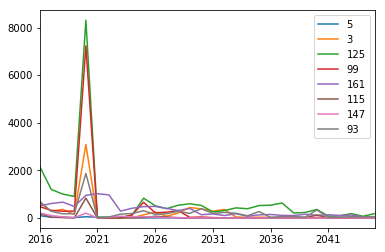

In [27]:
for l in lids:
    total.fillna(0).loc[l].plot(legend=True)

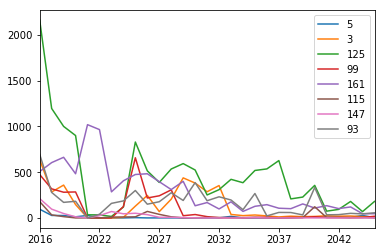

In [28]:
total_no_2020 = total[[c for c in total.columns if c not in ['2020']]]
for l in lids:
    total_no_2020.fillna(0).loc[l].plot(legend=True)
# total_no_2020

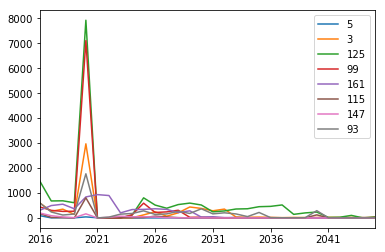

In [29]:
res = pd.read_csv('run{}_res.csv'.format(runnum), index_col=0)
for l in lids:
    res.fillna(0).loc[l].plot(legend=True)

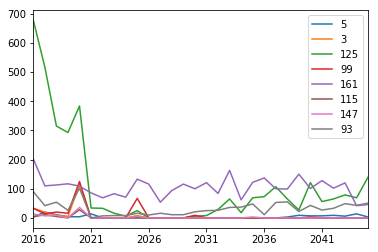

In [30]:
nonres = pd.read_csv('run{}_nonres.csv'.format(runnum), index_col=0)
for l in lids:
    nonres.fillna(0).loc[l].plot(legend=True)

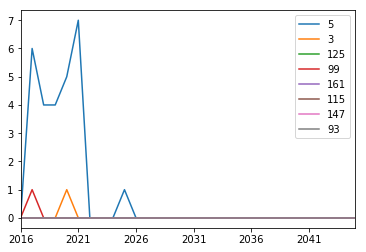

In [31]:
mixed = pd.read_csv('run{}_mixed.csv'.format(runnum), index_col=0)
for l in lids:
    mixed.fillna(0).loc[l].plot(legend=True)